In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from pymatgen.util.plotting_utils import get_publication_quality_plot
from pyqe.qe_output import *

mpl.rcParams['axes.linewidth']=3
mpl.rcParams['lines.markeredgewidth']=3
mpl.rcParams['lines.linewidth']=2
mpl.rcParams['lines.markersize']=5
mpl.rcParams['xtick.major.width']=3
mpl.rcParams['xtick.major.size']=8
mpl.rcParams['xtick.minor.width']=3
mpl.rcParams['xtick.minor.size']=4
mpl.rcParams['ytick.major.width']=3
mpl.rcParams['ytick.major.size']=8
mpl.rcParams['ytick.minor.width']=3
mpl.rcParams['ytick.minor.size']=4

In [2]:
def update_volume(csv_file,e_scale=4):
    b = BasicAnalyzer(csv_file,'alat',e_scale)
    assert b['alat'].max() != b['alat'].min()
    df = b.df
    df['volume'] = df.alat**3
    return df

def get_poly_params(df):
    z = np.polyfit(df['volume'],df['energy'],4)
    p0 = np.poly1d(z)
    p2 = p0.deriv(2)
    return p0,p2

def get_ev_plot(df):
    p0,p2 = get_poly_params(df)
    plt = get_publication_quality_plot(8,6)
    plt.plot(df.volume,df.energy,'bo',fillstyle='none',label='raw data')
    v = np.arange(df.volume.min(),df.volume.max(),0.01)
    plt.plot(v,p0(v),'r--',lw=2,label='fitted curve')
    plt.xlabel('Volume ($\AA^3$)')
    plt.ylabel('Energy (meV/cubic cell)')
    plt.legend(loc=9,fontsize=20)
    plt.tight_layout()
    return plt

def get_bulk_modulus(df):
    p0,p2 = get_poly_params(df)
    i = df['energy'].idxmin()
    v0 = df.loc[i]['volume']
    return v0*p2(v0)*0.1602

5.4671652


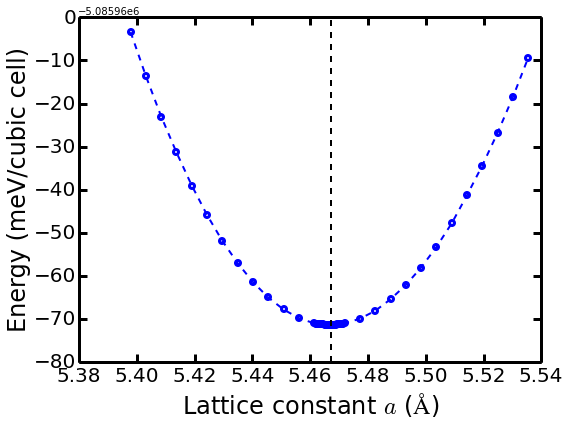

In [3]:
plt1a = get_ea_plot('Si_latt_gga.csv',4)
plt1a.ylabel('Energy (meV/cubic cell)')
plt1a.tight_layout()
plt1a.savefig('gga_a.pdf')

89.3583076065


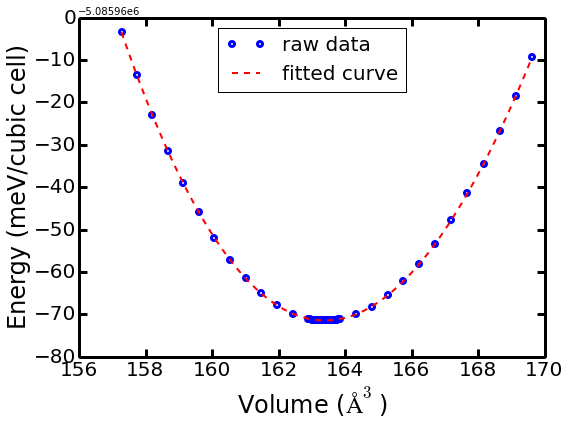

In [4]:
df1 = update_volume('Si_latt_gga.csv')
plt1v = get_ev_plot(df1)
plt1v.savefig('gga_v.pdf')
k1 = get_bulk_modulus(df1)
print k1

5.3999568


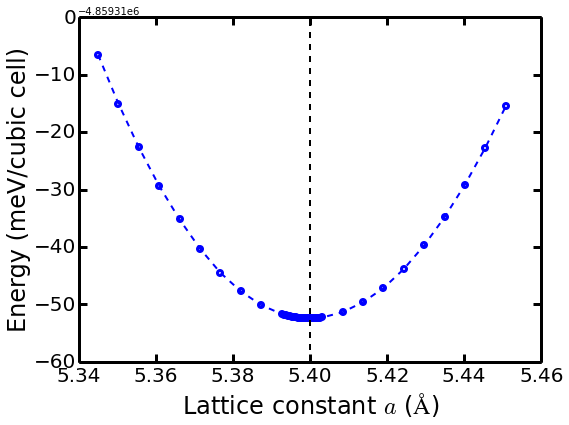

In [5]:
plt2a = get_ea_plot('Si_latt_lda.csv',4)
plt2a.ylabel('Energy (meV/cubic cell)')
plt2a.tight_layout()
plt2a.savefig('lda_a.pdf')

97.1147310629


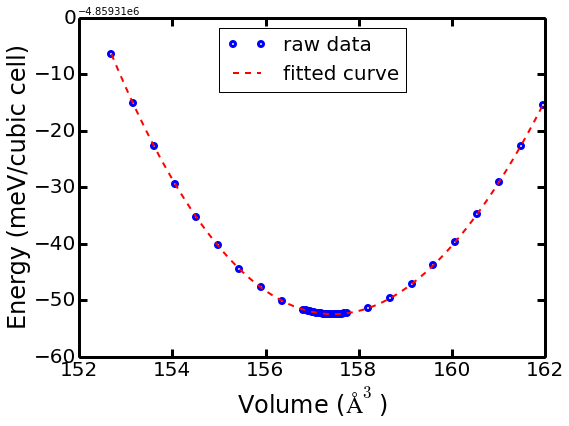

In [6]:
df2 = update_volume('Si_latt_lda.csv')
plt2v = get_ev_plot(df2)
plt2v.savefig('lda_v.pdf')
k2 = get_bulk_modulus(df2)
print k2